In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def relative_deviation(obs, pred):
    return np.sum(np.abs(obs-pred)/obs)/len(obs) * 100


def R2(target, pred):
    return np.corrcoef(target, pred)[0, 1] ** 2


def RRMSE(target, pred):
    num = np.sum((target - pred) ** 2)
    den = np.sum((np.mean(target) - target) ** 2)
    return np.sqrt(num/den)


def RMSE(target, pred):
    N = len(target)
    return np.sqrt(np.sum((target-pred)**2)/N)

In [3]:
data = pd.read_csv('ICMC_oxides_TEC.csv')
data = data.iloc[:, 1:]
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

In [4]:
rds = []
r2s = []
rrmses = []
rmses = []

target_values = []
predictions = []

kf = KFold(n_splits=10, random_state=1, shuffle=True)
fold = 1
for train_index, test_index in kf.split(X):
    print('Fold {:02d}'.format(fold))
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    y_train = np.log(y_train)
    
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)
    
    preds = np.exp(rf.predict(X_test))
    
    predictions.extend(preds.tolist())
    target_values.extend(y_test.tolist())
    
    rds.append(relative_deviation(y_test, preds))
    r2s.append(R2(y_test, preds))
    rrmses.append(RRMSE(y_test, preds))
    rmses.append(RMSE(y_test, preds))
    
    fold += 1

Fold 01
Fold 02
Fold 03
Fold 04
Fold 05
Fold 06
Fold 07
Fold 08
Fold 09
Fold 10


In [5]:
print('RD:', np.mean(rds))
print('R2:', np.mean(r2s))
print('RRMSE:', np.mean(rrmses))
print('RMSE:', np.mean(rmses))

RD: 7.43335447481689
R2: 0.8561051552615719
RRMSE: 0.38163414934190387
RMSE: 1.5534429742208203e-06


In [6]:
sorter = np.argsort(target_values)
arr_target = np.array(target_values)
arr_preds = np.array(predictions)

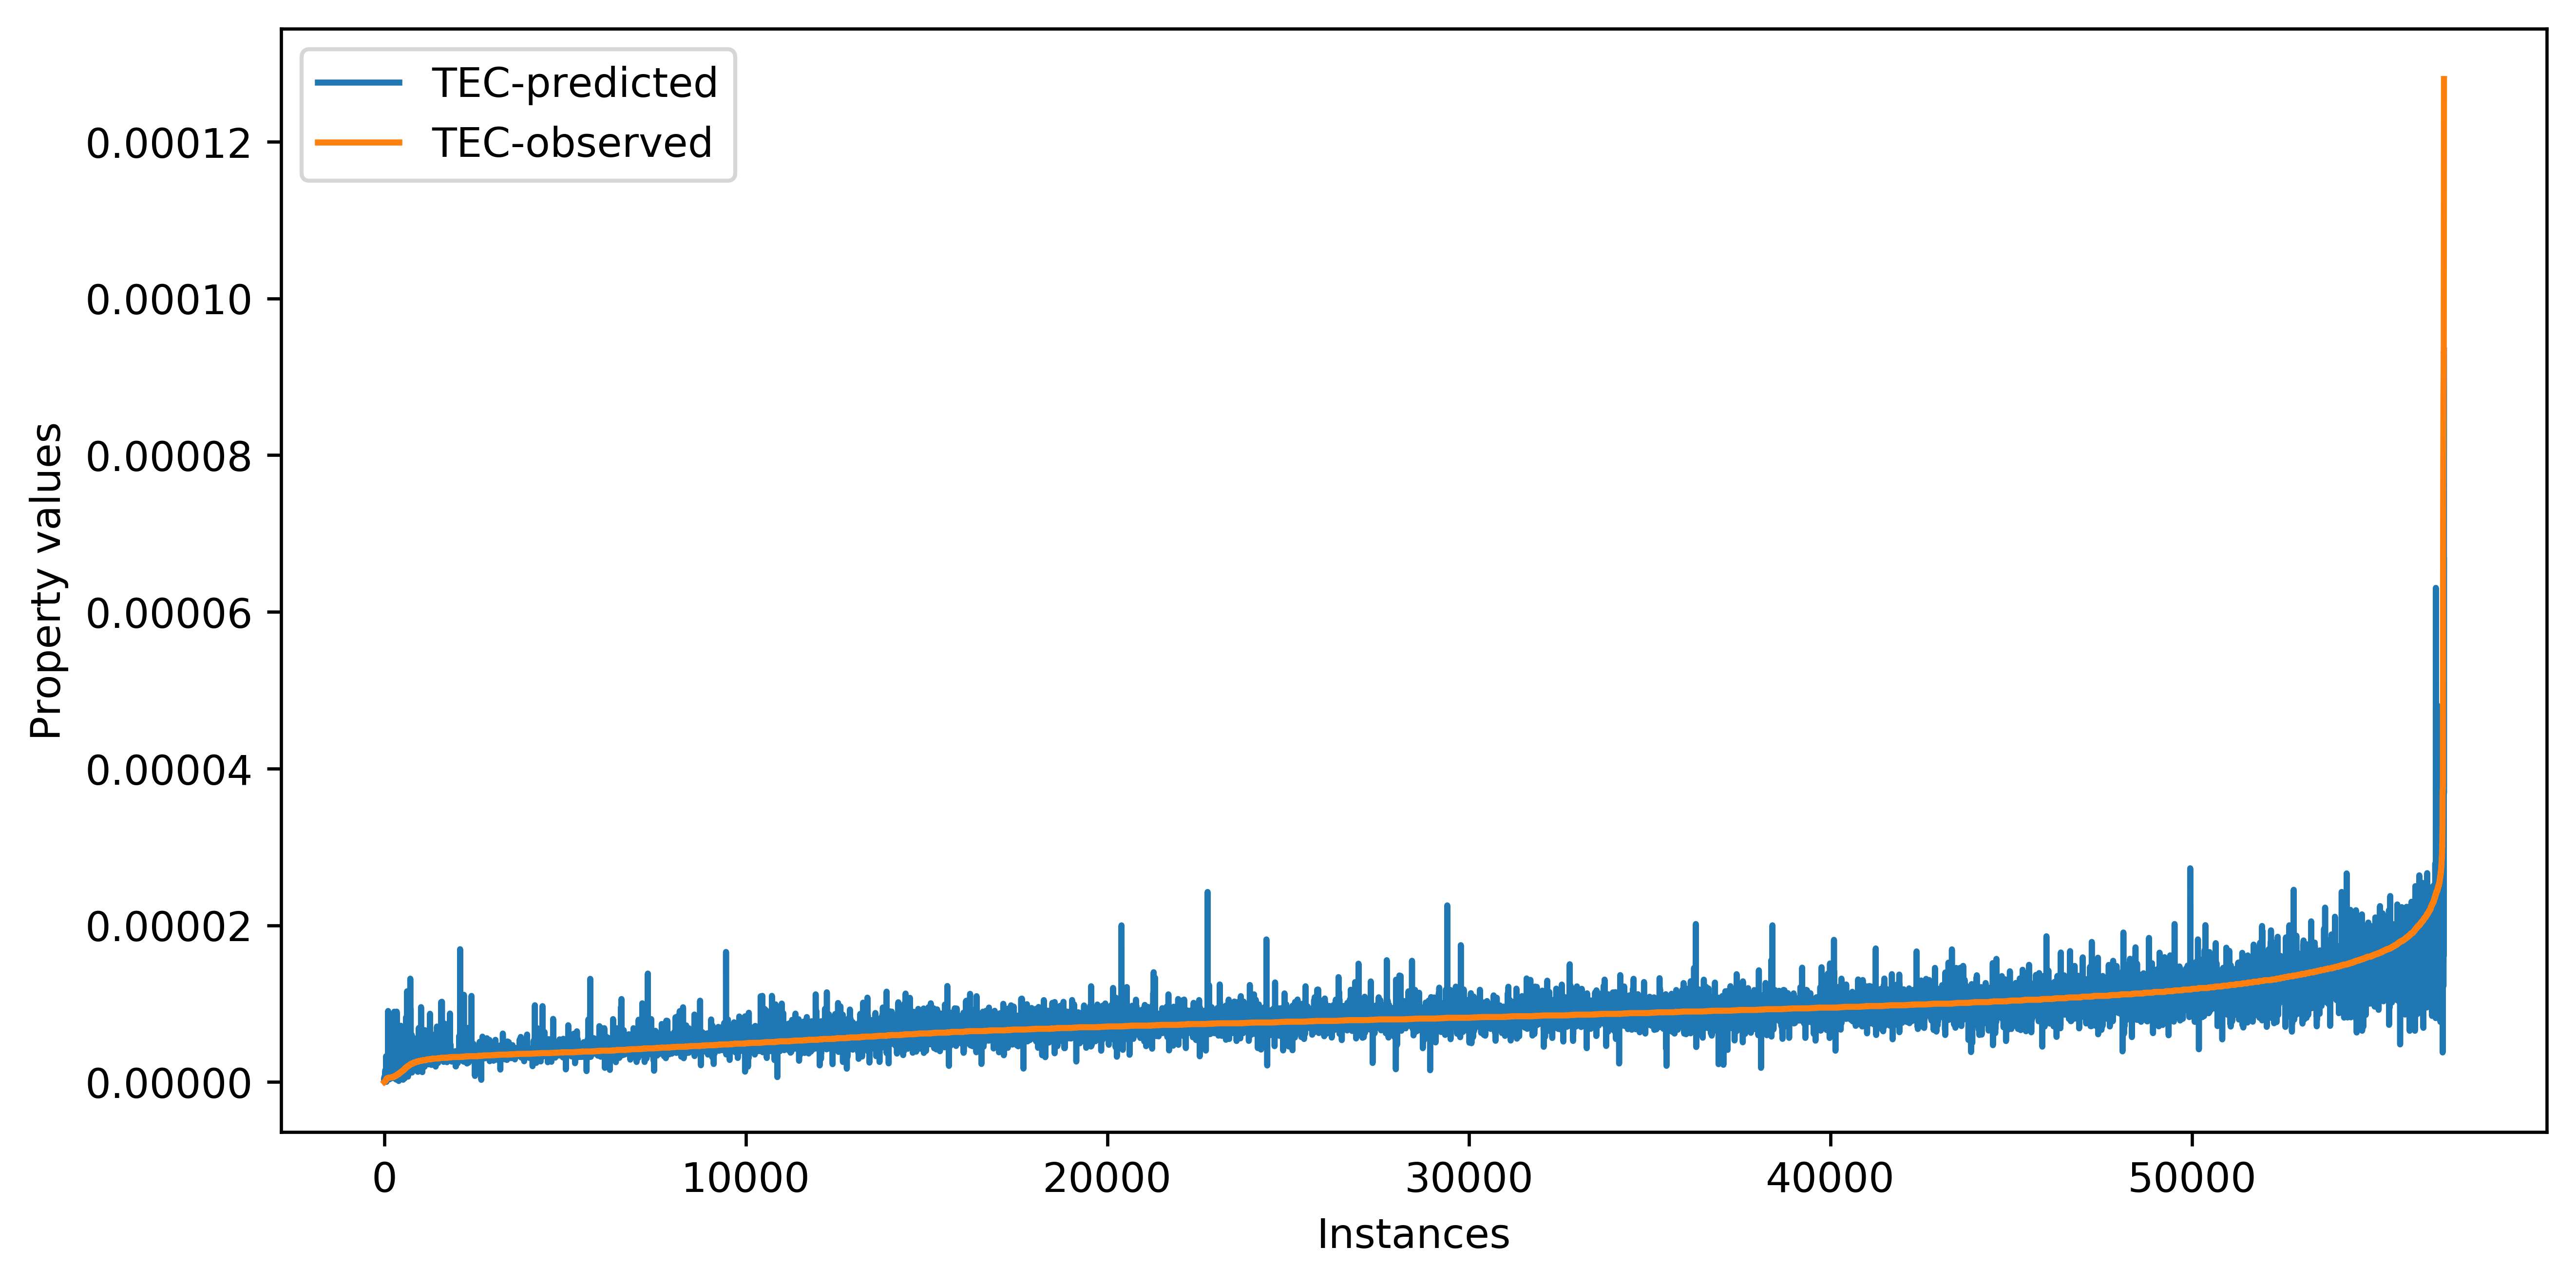

In [7]:
fig, ax = plt.subplots(figsize=(10,5), dpi=600)
sns.lineplot([i for i in range(len(target_values))], arr_preds[sorter], label='TEC-predicted')
sns.lineplot([i for i in range(len(target_values))], arr_target[sorter], label='TEC-observed')
ax.set(xlabel='Instances', ylabel='Property values')
fig.savefig('ordered_TEC_lines.png')

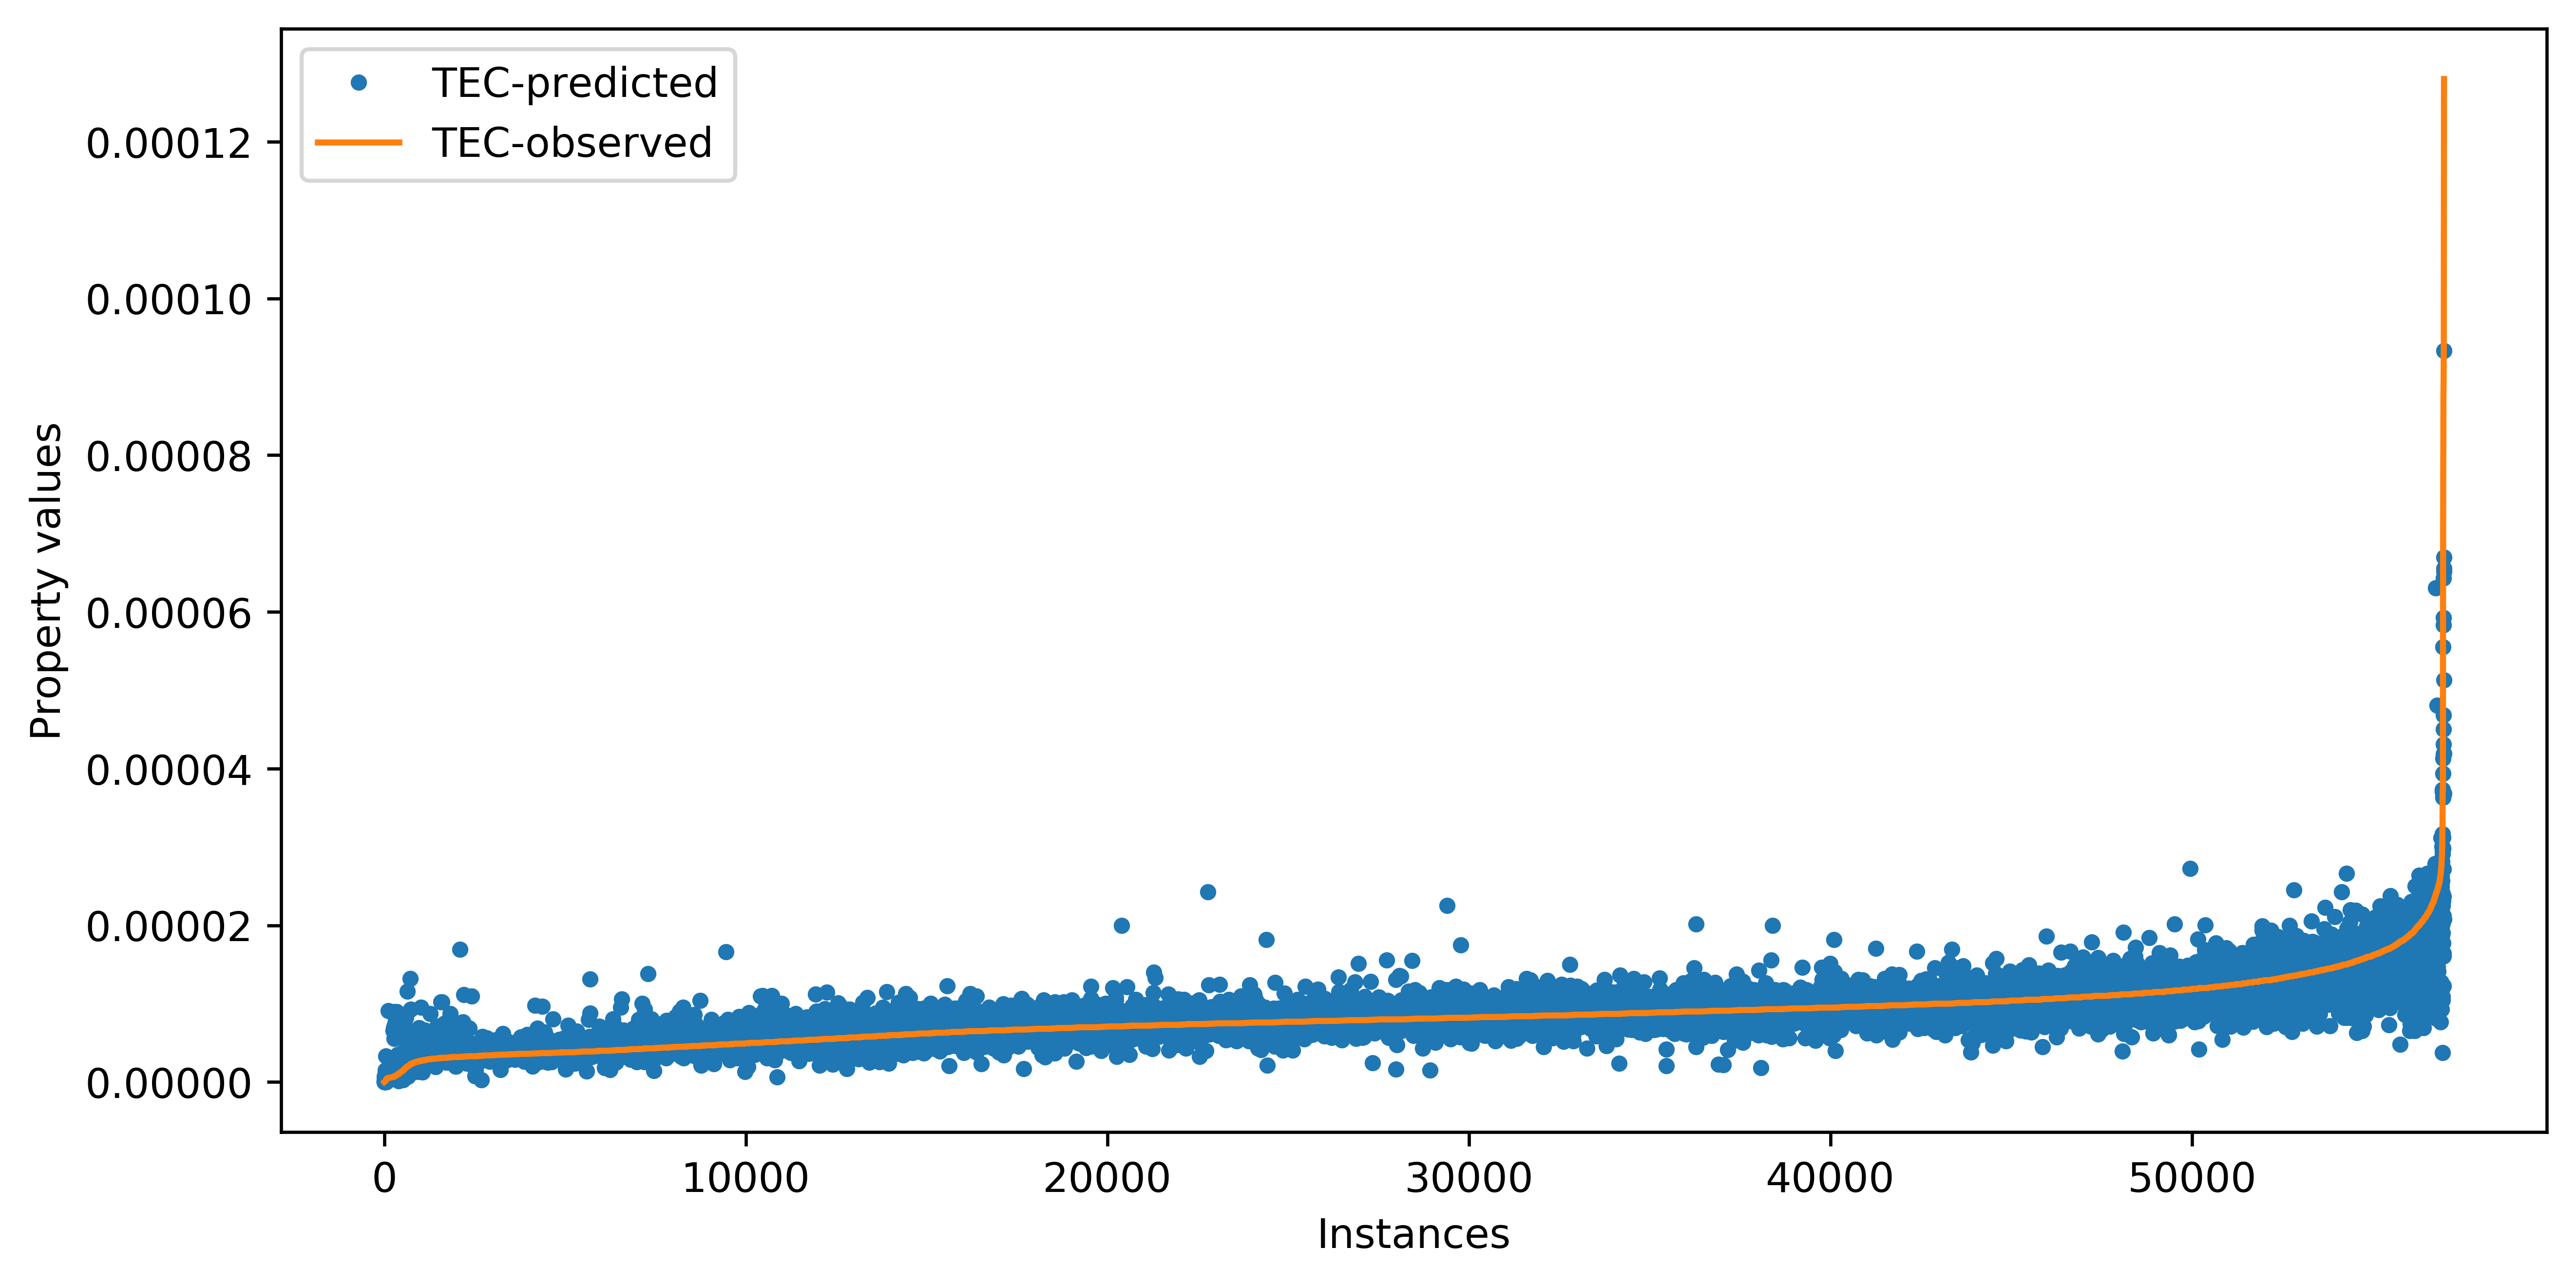

In [8]:
fig, ax = plt.subplots(figsize=(10,5), dpi=600)
ax.plot([i for i in range(len(target_values))], arr_preds[sorter], '.', label='TEC-predicted')
ax.plot([i for i in range(len(target_values))], arr_target[sorter], label='TEC-observed')
ax.set(xlabel='Instances', ylabel='Property values')
plt.legend()
fig.savefig('ordered_TEC_scatter.png')

In [15]:
s_median = arr_target < np.median(arr_target)

print('Median TEC:', np.median(arr_target))
print()
print('Errors smaller than the median:')
print('RD:', relative_deviation(arr_target[s_median], arr_preds[s_median]))
print('R2:', R2(arr_target[s_median], arr_preds[s_median]))
print('RMSE:', RMSE(arr_target[s_median], arr_preds[s_median]))
print('RRMSE:', RMSE(arr_target[s_median], arr_preds[s_median]))


g_median = np.logical_not(s_median)
print()
print('Errors greater than the median:')
print('RD:', relative_deviation(arr_target[g_median], arr_preds[g_median]))
print('R2:', R2(arr_target[g_median], arr_preds[g_median]))
print('RMSE:', RMSE(arr_target[g_median], arr_preds[g_median]))
print('RRMSE:', RMSE(arr_target[g_median], arr_preds[g_median]))

Median TEC: 8.06999969482422e-06

Errors smaller than the median:
RD: 8.62406370452506
R2: 0.8548746408630673
RMSE: 7.196970154214817e-07
RRMSE: 7.196970154214817e-07

Errors greater than the median:
RD: 6.243898623245255
R2: 0.7282870634371292
RMSE: 2.1103339139247444e-06
RRMSE: 2.1103339139247444e-06
